# Worksheet 07

Name:  
UID: 

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

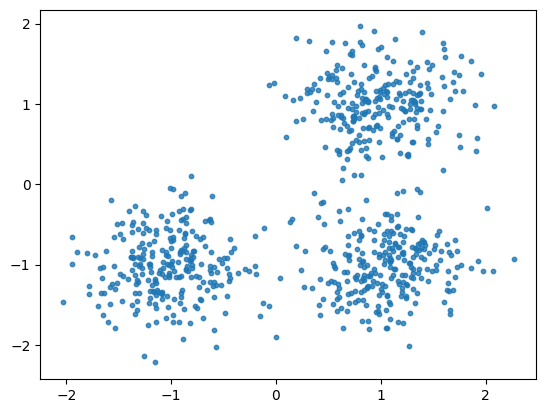

/var/folders/8p/5538p2ts331fp04w65x4gkhm0000gp/T/ipykernel_9441/251671325.py:30: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=clustering, cmap=cmap, s=10, alpha=0.8)


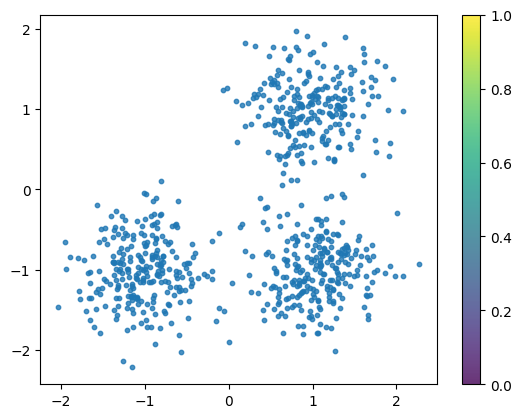

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        return

clustering = DBC(X, 3, .2).dbscan()
n_clusters=len(np.unique(clustering))
cmap = plt.get_cmap("tab20", n_clusters)
plt.scatter(X[:, 0], X[:, 1], c=clustering, cmap=cmap, s=10, alpha=0.8)
plt.show()